In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

#Manipulación de datos con pandas
def leer_csv(ruta_csv):
    # Leer el archivo CSV
    df = pd.read_csv(ruta_csv, delimiter=';', encoding='utf-8')
    # Elimina espacios ocultos en nombres de columnas
    df.columns = df.columns.str.strip()
    return df
ruta_csv="Data Prueba técnica.csv"  
#  Cargar archivos
data = leer_csv(ruta_csv)

print(data.head())


   user_id     country  Days_Since_Registration  Deposit_count  Av_Deposit  \
0        1       CHILE                     1720              0           0   
1        2      MEXICO                     1720              0           0   
2        3    COLOMBIA                     1720              0           0   
3        4   COSTARICA                     1720              0           0   
4        5  ELSALVADOR                     1720              0           0   

   Last_deposit_day  Total_sessions  Total_game_time  \
0                 0               2           131.03   
1                 0               2           120.72   
2                 0               2           124.21   
3                 0               2            88.99   
4                 0               2            96.01   

                                  Favorite_Game device_type Churn_risk  Age  \
0                                 Live Roulette     Desktop         0%   30   
1                                   

In [57]:

import os

# Configuración de conexión
USER = "postgres"
PASSWORD = os.getenv("POSTGRES_PASSWORD")  # se lee de variable de entorno
HOST = "localhost"
PORT = "15432"
DB = "casino"

engine = create_engine(f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}")

# Probar la conexión
pd.read_sql("SELECT version();", engine)


,version
0,PostgreSQL 17.5 (Debian 17.5-1.pgdg120+1) on x...


In [37]:
# Leer las primeras filas de usuarios
df = pd.read_sql("SELECT * FROM usuarios LIMIT 5;", engine)
df.head()


,user_id,country,days_since_registration,deposit_count,av_deposit,last_deposit_day,total_sessions,total_game_time,favorite_game,device_type,churn_risk,age,gender,lifecycle_stage,future_value
0,1,CHILE,1720,0,0.0,0,2,131.03,Live Roulette,Desktop,0%,30,Male,Dormant,5438.0467
1,2,MEXICO,1720,0,0.0,0,2,120.72,Bookofdead,Mobile,100%,30,Male,Dormant,5438.0467
2,3,COLOMBIA,1720,0,0.0,0,2,124.21,Tomeofmadness,Mobile,100%,30,Male,Dormant,5438.0467
3,4,COSTARICA,1720,0,0.0,0,2,88.99,John Hunter And The Tomb Of The Scarab Queen,Mobile,100%,30,Male,Dormant,5438.0467
4,5,ELSALVADOR,1720,0,0.0,0,2,96.01,Sizzling Hot� Deluxe,Mobile,100%,30,Male,Dormant,5438.0467


C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

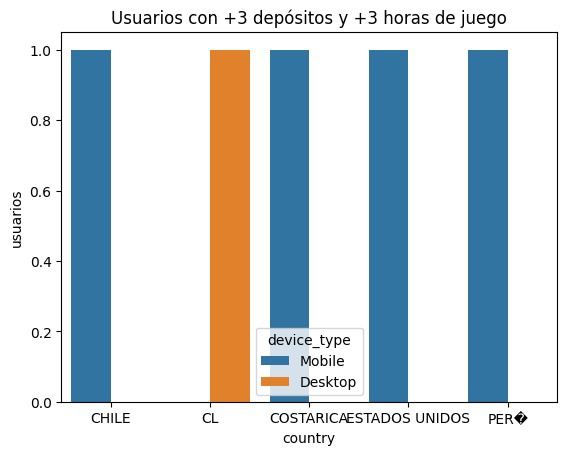

In [11]:
# Escribir la consulta SQL
query_users = """
SELECT country, device_type, COUNT(*) as usuarios
FROM usuarios
WHERE deposit_count > 3
  AND total_game_time > 200          -- No hay quienes superen los 300 minutos y que depositen >3 veces, por tanto se hace la prueba con 3 horas
GROUP BY country, device_type
ORDER BY usuarios DESC;
"""
# Ejecutar y obtener resultado en un DataFrame
df_users = pd.read_sql(query_users, engine)
# Mostrar los encabezados
df_users.head()

sns.barplot(data=df_users, x="country", y="usuarios", hue="device_type")
plt.title("Usuarios con +3 depósitos y +3 horas de juego")
plt.show()


C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

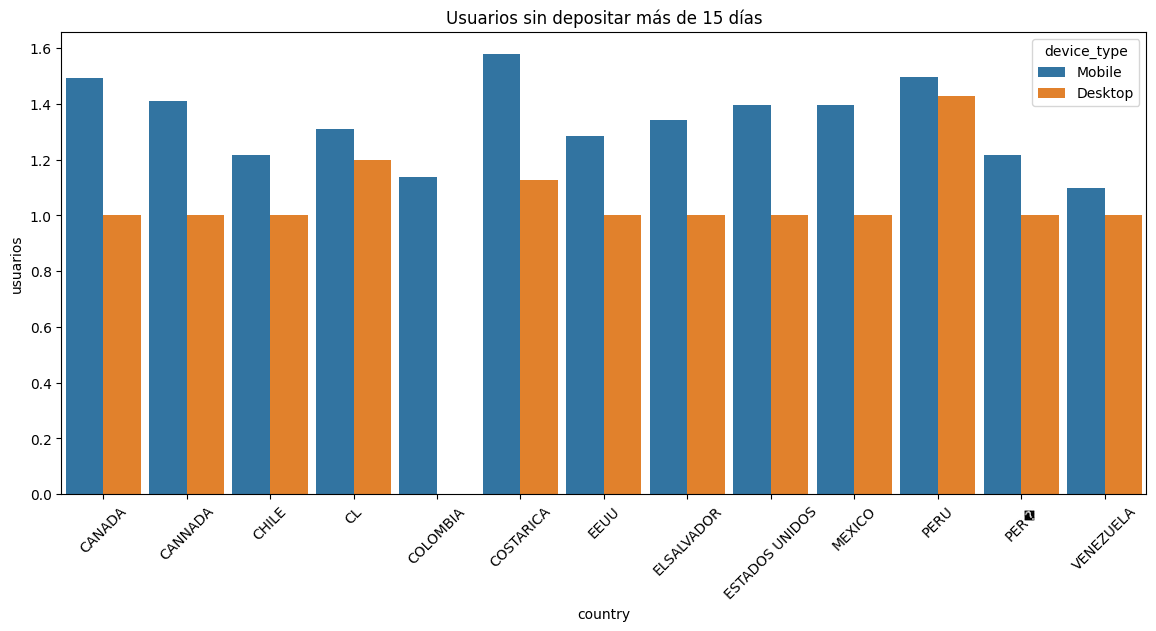

In [22]:
query_users = """
SELECT country, favorite_game, device_type, COUNT(user_id) AS usuarios
FROM usuarios
WHERE last_deposit_day > 15
GROUP BY country, favorite_game, device_type
ORDER BY country ASC;
"""
# Ejecutar y obtener resultado en un DataFrame
df_users = pd.read_sql(query_users, engine)
# Mostrar los encabezados
df_users.head()

plt.figure(figsize=(14,6))
sns.barplot(data=df_users, x="country", y="usuarios", hue="device_type", width=0.9, errorbar=None)
plt.title("Usuarios sin depositar más de 15 días")
plt.xticks(rotation=45) 
plt.show()

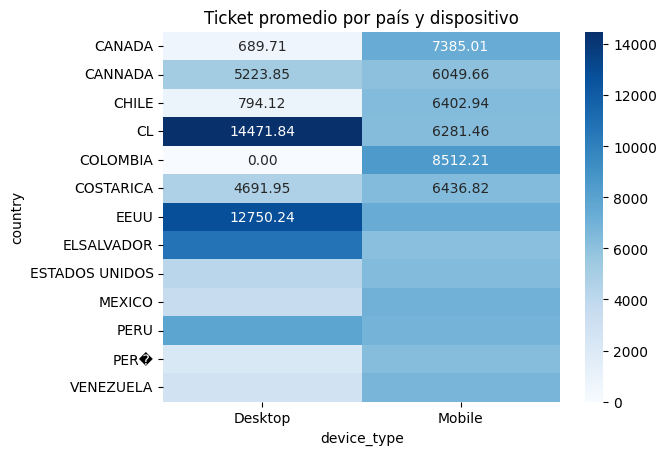

In [26]:
query_users = """
SELECT country, device_type, AVG(av_deposit) AS ticket_promedio FROM usuarios
GROUP BY country, device_type
ORDER BY ticket_promedio DESC;
"""
df_ticket = pd.read_sql(query_users, engine)

pivot_ticket = df_ticket.pivot(index="country", columns="device_type", values="ticket_promedio")
sns.heatmap(pivot_ticket, annot=True, fmt=".2f", cmap="Blues")
plt.title("Ticket promedio por país y dispositivo")
plt.show()


C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


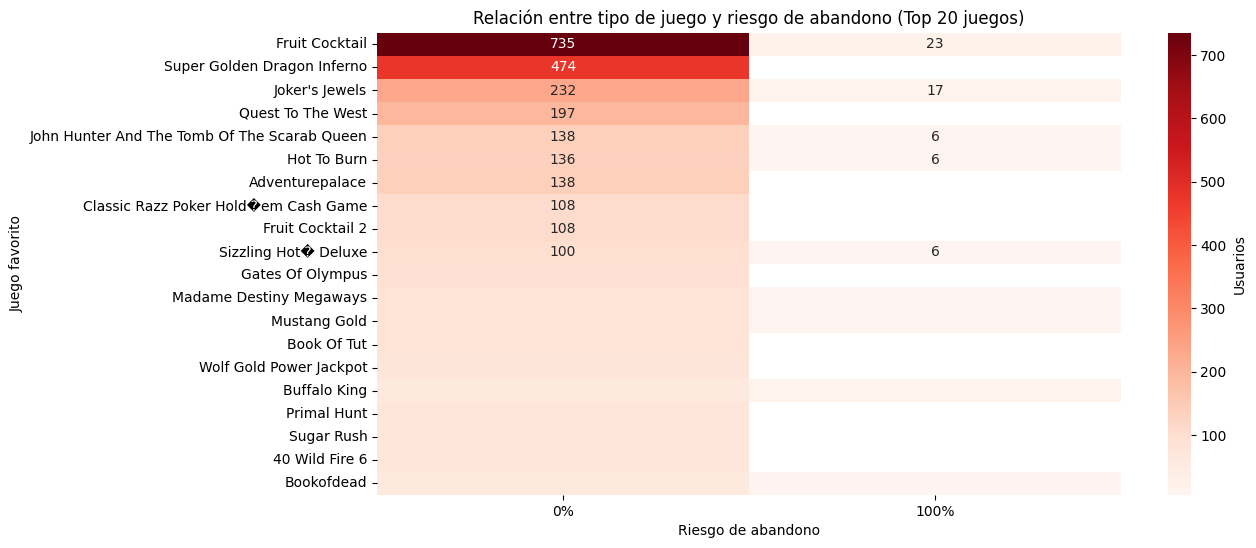

C:\Users\darie\anaconda3\envs\casino_online\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


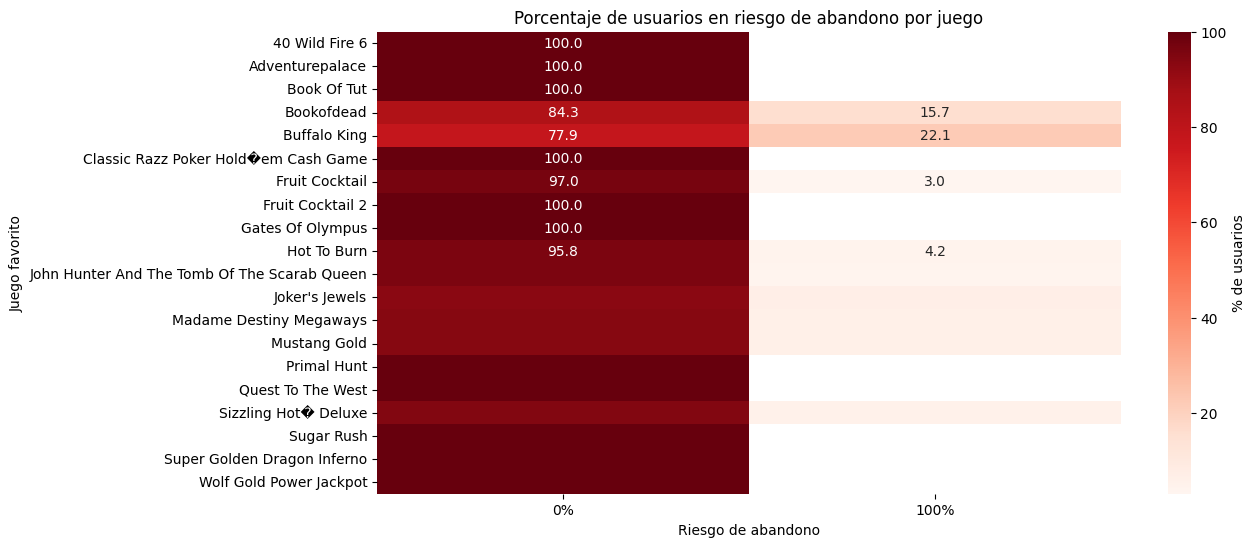

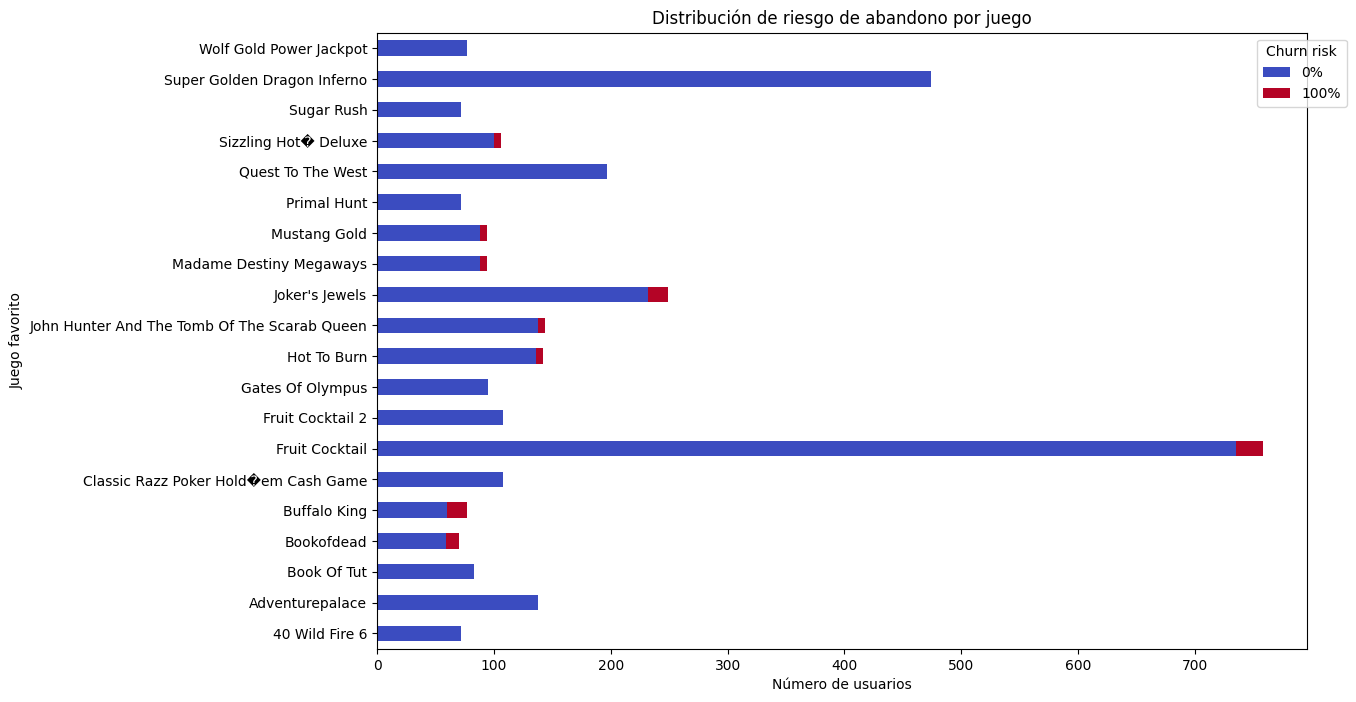

In [45]:
query = """
SELECT favorite_game, churn_risk, COUNT(*) as usuarios
FROM usuarios
GROUP BY favorite_game, churn_risk;
"""
df_churn = pd.read_sql(query, engine)

# Ordenar por total de usuarios y tomar top 20
top_games = df_churn.groupby("favorite_game")["usuarios"].sum().nlargest(20).index
df_top = df_churn[df_churn["favorite_game"].isin(top_games)]

pivot_churn = df_top.pivot(index="favorite_game", columns="churn_risk", values="usuarios")
pivot_churn = pivot_churn.loc[pivot_churn.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(12,6))
sns.heatmap(pivot_churn, annot=True, fmt=".0f", cmap="Reds", cbar_kws={'label': 'Usuarios'})
plt.title("Relación entre tipo de juego y riesgo de abandono (Top 20 juegos)")
plt.xlabel("Riesgo de abandono")
plt.ylabel("Juego favorito")
plt.show()

# Calcular porcentaje de usuarios en riesgo por juego, se toman 20 usuarios por problemas de espacio y de mejor legibilidad
df_pct = df_top.copy()
df_pct["total"] = df_pct.groupby("favorite_game")["usuarios"].transform("sum")
df_pct["pct"] = df_pct["usuarios"] / df_pct["total"] * 100

pivot_pct = df_pct.pivot(index="favorite_game", columns="churn_risk", values="pct")
pivot_pct = pivot_pct.rename(columns={0: "Activo", 1: "En riesgo"})


plt.figure(figsize=(12, 6))
sns.heatmap(pivot_pct, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': '% de usuarios'})
plt.title("Porcentaje de usuarios en riesgo de abandono por juego")
plt.xlabel("Riesgo de abandono")
plt.ylabel("Juego favorito")
plt.show()


# Pivot con valores absolutos, tambien se toman 20.
pivot_churn = df_top.pivot(index="favorite_game", columns="churn_risk", values="usuarios")

# Gráfico de barras apiladas
pivot_churn.plot(
    kind="barh", stacked=True, figsize=(12, 8), colormap="coolwarm"
)
plt.xlabel("Número de usuarios")
plt.ylabel("Juego favorito")
plt.title("Distribución de riesgo de abandono por juego")
plt.legend(title="Churn risk", bbox_to_anchor=(1.05, 1))
plt.show()



